In [2]:
# Importing all the libraries for Quantitative analysis
# Data manipulation and analysis
import pandas as pd  # For handling data and performing EDA
import numpy as np  # For numerical operations

# Visualization
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For advanced statistical plots


# Correlation Analysis
import phik
from phik import resources


# Statistical tests
from scipy import stats  # For statistical tests including chi-square
from scipy.stats import chi2_contingency

# OLS regression
import statsmodels.api as sm  # For statistical models, including OLS regression
import statsmodels.formula.api as smf  # For formula-based statistical models

# Load the data
data = pd.read_csv('final.csv')
data

,Understanding_Bait_Lamina_Method,Ease_of_Navigation_&_Use,Clarity_of_Calculation,Usefulness_Scatter_Plot,Report_Generation_Useful,Overall_Satisfaction,Web-App_Vs_Excel,Gender,Education_Level
0,4,3,Confusing,5,yes,5,Strongly agree,Male,School
1,2,2,Clear,1,yes,1,Strongly agree,Male,School
2,4,5,Quite confusing,3,yes,5,Somewhat agree,Female,School
3,1,1,Clear,1,yes,1,Strongly agree,Male,School
4,1,1,Clear,2,yes,1,Strongly agree,Male,School
...,...,...,...,...,...,...,...,...,...
110,2,1,Quite clear,2,yes,1,Somewhat agree,Male,University
111,1,2,Clear,1,yes,3,Strongly agree,Male,University
112,1,1,Quite clear,1,yes,1,Strongly agree,Female,University
113,1,1,Quite clear,1,yes,1,Strongly agree,Male,University


interval columns not set, guessing: ['Understanding_Bait_Lamina_Method', 'Ease_of_Navigation_&_Use', 'Usefulness_Scatter_Plot', 'Overall_Satisfaction']
Phi-k Correlation Matrix:
                                  Understanding_Bait_Lamina_Method  \
Understanding_Bait_Lamina_Method                          1.000000   
Ease_of_Navigation_&_Use                                  0.563127   
Clarity_of_Calculation                                    0.326333   
Usefulness_Scatter_Plot                                   0.563947   
Report_Generation_Useful                                  0.579089   
Overall_Satisfaction                                      0.901229   
Web-App_Vs_Excel                                          0.230512   
Gender                                                    0.000000   
Education_Level                                           0.394434   

                                  Ease_of_Navigation_&_Use  \
Understanding_Bait_Lamina_Method                  0.563127 

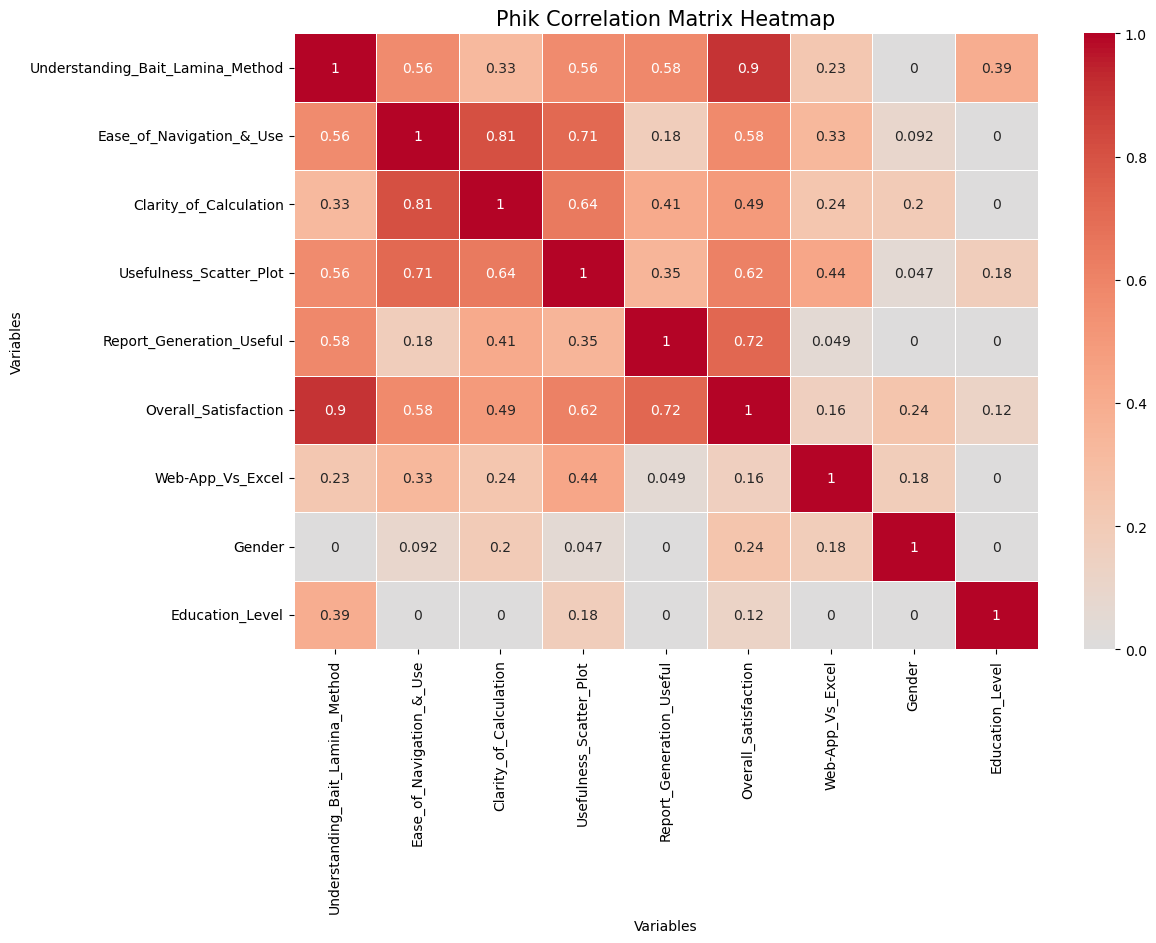

In [3]:
# Calculate the Phi-k correlation matrix
corr_matrix = data.phik_matrix()

# Display the correlation matrix
print("Phi-k Correlation Matrix:")
print(corr_matrix)

# Check for significant correlations
threshold = 0.5  # Define the threshold for strong correlation
significant_correlations = corr_matrix > threshold  # Create a boolean mask
print("Significant Correlations (greater than 0.5):")
print(significant_correlations)

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Customize the plot
plt.title('Phik Correlation Matrix Heatmap', fontsize=15)
plt.xlabel('Variables')
plt.ylabel('Variables')

# Display the heatmap
plt.show()

Chi-Square Test for Gender vs Understanding_Bait_Lamina_Method:
Chi-Squared Statistic: 1.5596, p-value: 0.6686


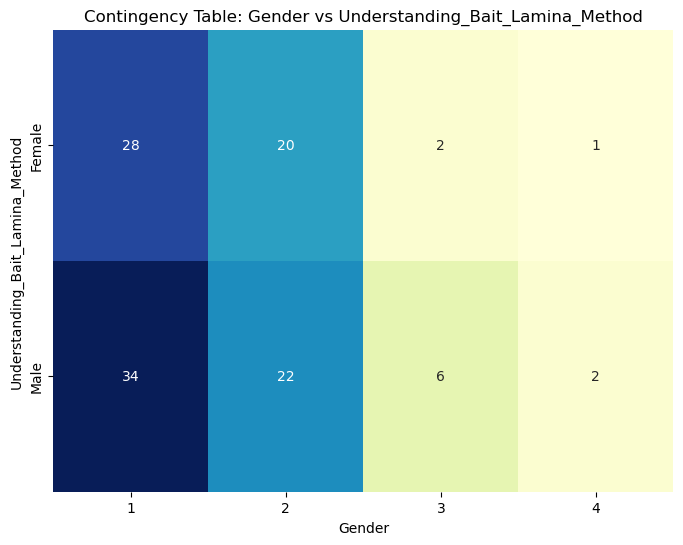

Chi-Square Test for Gender vs Overall_Satisfaction:
Chi-Squared Statistic: 5.9568, p-value: 0.1137


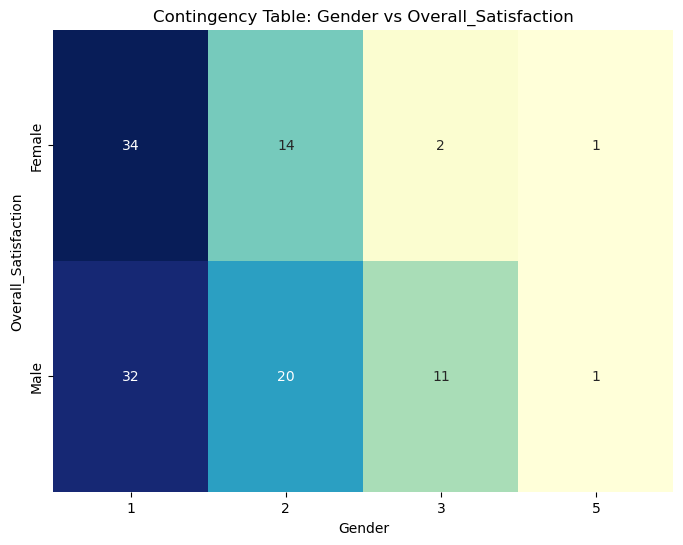

Chi-Square Test for Gender vs Web-App_Vs_Excel:
Chi-Squared Statistic: 9.5628, p-value: 0.0485


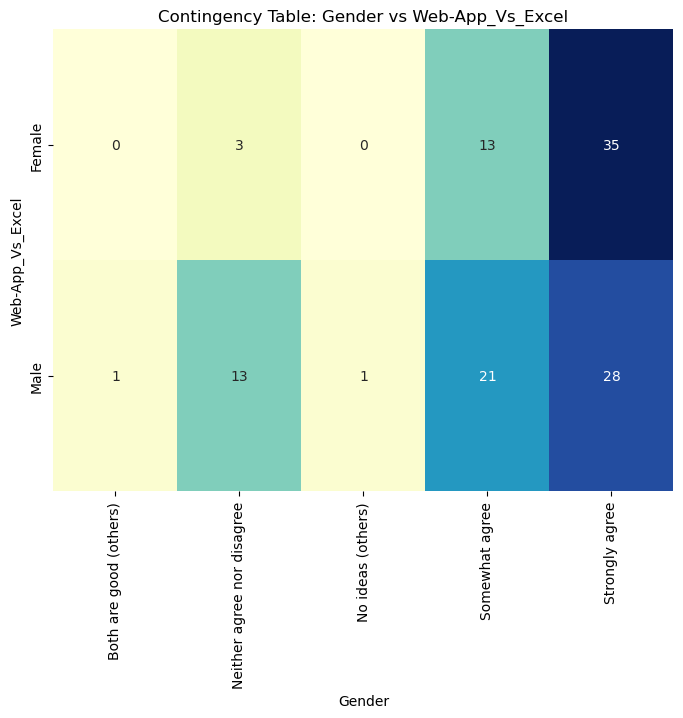

Chi-Square Test for Education_Level vs Understanding_Bait_Lamina_Method:
Chi-Squared Statistic: 10.8320, p-value: 0.0127


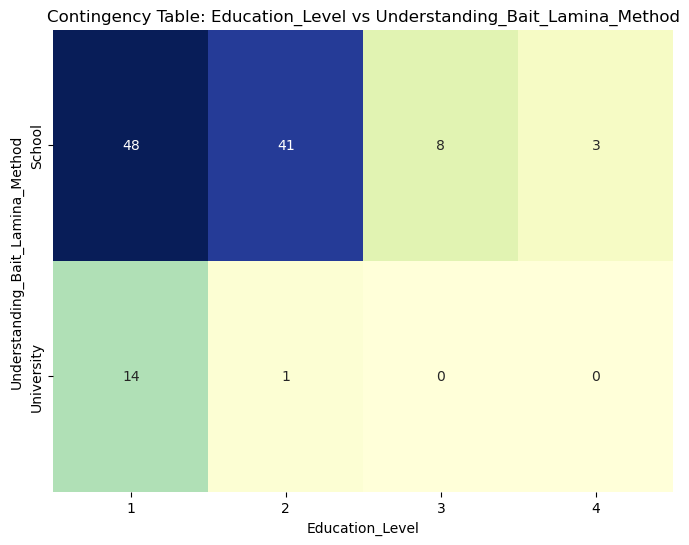

Chi-Square Test for Education_Level vs Web-App_Vs_Excel:
Chi-Squared Statistic: 3.8326, p-value: 0.4291


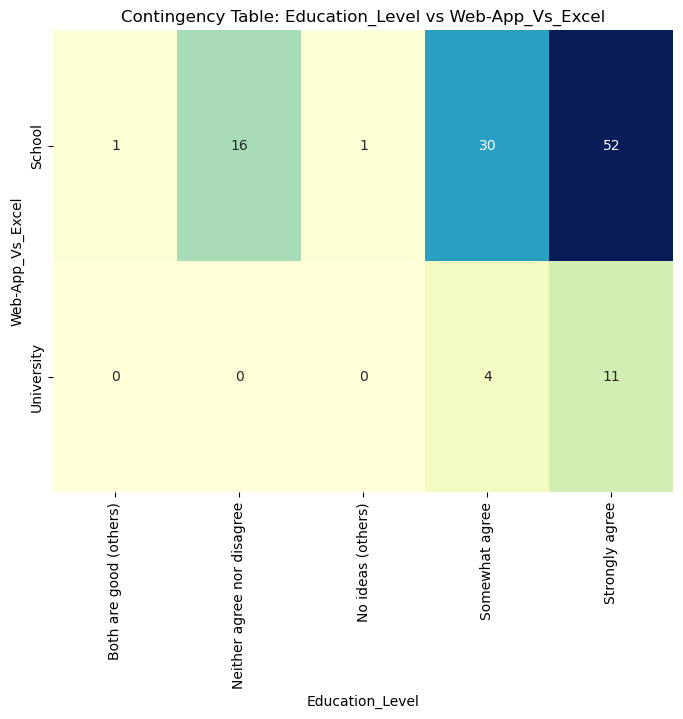

Chi-Square Test for Education_Level vs Overall_Satisfaction:
Chi-Squared Statistic: 3.7018, p-value: 0.2955


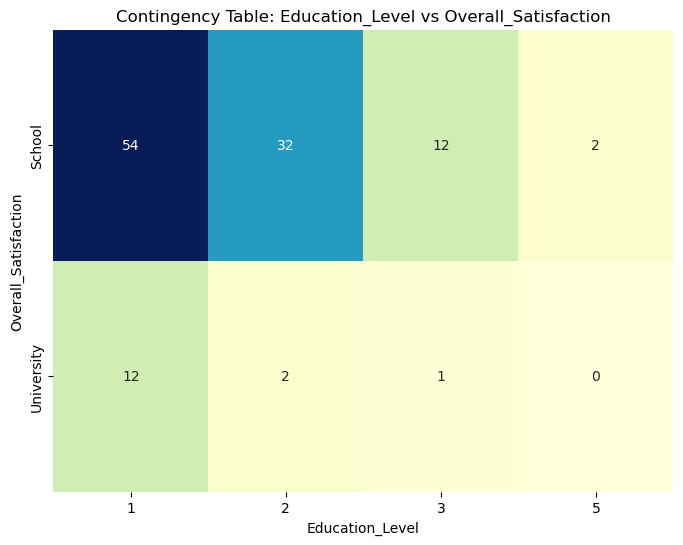

Chi-Square Test for Report_Generation_Useful vs Overall_Satisfaction:
Chi-Squared Statistic: 33.1524, p-value: 0.0000


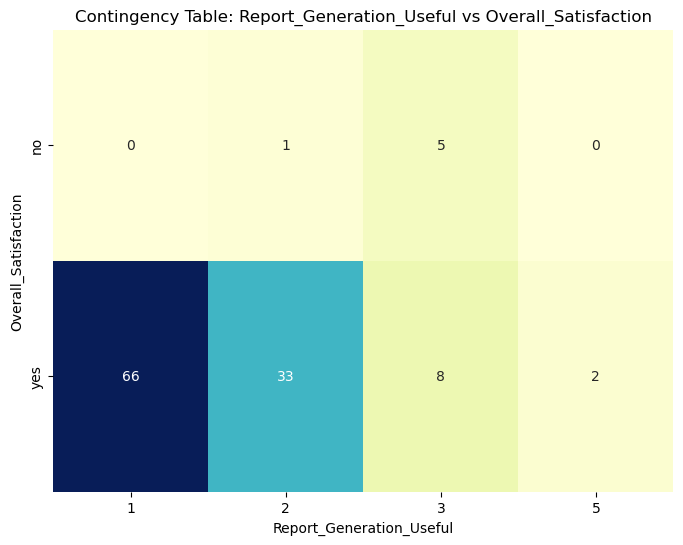

In [5]:
# Function to perform Chi-Square Test and visualize results
def chi_square_test_and_visualize(col1, col2, data):
    # Create a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    
    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-Square Test for {col1} vs {col2}:")
    print(f"Chi-Squared Statistic: {chi2:.4f}, p-value: {p:.4f}")
    
    # Visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title(f'Contingency Table: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

# Chi-Square Tests and Visualizations
chi_square_test_and_visualize('Gender', 'Understanding_Bait_Lamina_Method', data)
chi_square_test_and_visualize('Gender', 'Overall_Satisfaction', data)
chi_square_test_and_visualize('Gender', 'Web-App_Vs_Excel', data)
chi_square_test_and_visualize('Education_Level', 'Understanding_Bait_Lamina_Method', data)
chi_square_test_and_visualize('Education_Level', 'Web-App_Vs_Excel', data)
chi_square_test_and_visualize('Education_Level', 'Overall_Satisfaction', data)
chi_square_test_and_visualize('Report_Generation_Useful', 'Overall_Satisfaction', data)

In [9]:
# Mapping dictionaries for encoding
clarity_mapping = {
    'Quite clear': 1,
    'Clear': 2,
    'Neutral': 3,
    'Confusing': 4,
    'Quite confusing': 5
}
web_app_vs_excel_mapping = {
    'Strongly agree': 1,
    'Somewhat agree': 2,
    'Neither agree nor disagree': 3,
    'Somewhat disagree': 4,
    'Strongly disagree': 5,
    'Both are good (others)': 1,    # Assigning 1 to 'Both are good (others)'
    'No ideas (others)': 3         # Assigning 1 to 'No ideas (others)'
}
# Encode the 'Clarity_of_Calculation' column
data['Clarity_of_Calculation'] = data['Clarity_of_Calculation'].replace(clarity_mapping)

# Encode the 'Web-App_Vs_Excel' column
data['Web-App_Vs_Excel'] = data['Web-App_Vs_Excel'].replace(web_app_vs_excel_mapping)
data

,Understanding_Bait_Lamina_Method,Ease_of_Navigation_&_Use,Clarity_of_Calculation,Usefulness_Scatter_Plot,Report_Generation_Useful,Overall_Satisfaction,Web-App_Vs_Excel,Gender,Education_Level
0,4,3,4,5,yes,5,1,Male,School
1,2,2,2,1,yes,1,1,Male,School
2,4,5,5,3,yes,5,2,Female,School
3,1,1,2,1,yes,1,1,Male,School
4,1,1,2,2,yes,1,1,Male,School
...,...,...,...,...,...,...,...,...,...
110,2,1,1,2,yes,1,2,Male,University
111,1,2,2,1,yes,3,1,Male,University
112,1,1,1,1,yes,1,1,Female,University
113,1,1,1,1,yes,1,1,Male,University


                             OLS Regression Results                             
Dep. Variable:     Overall_Satisfaction   R-squared:                       0.601
Model:                              OLS   Adj. R-squared:                  0.582
Method:                   Least Squares   F-statistic:                     32.78
Date:                  Wed, 16 Oct 2024   Prob (F-statistic):           2.80e-20
Time:                          11:10:21   Log-Likelihood:                -87.925
No. Observations:                   115   AIC:                             187.8
Df Residuals:                       109   BIC:                             204.3
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

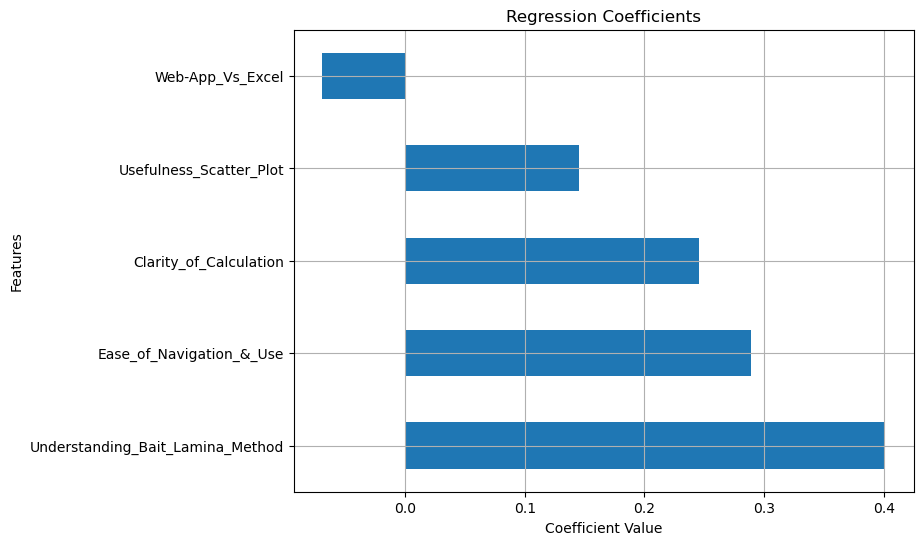

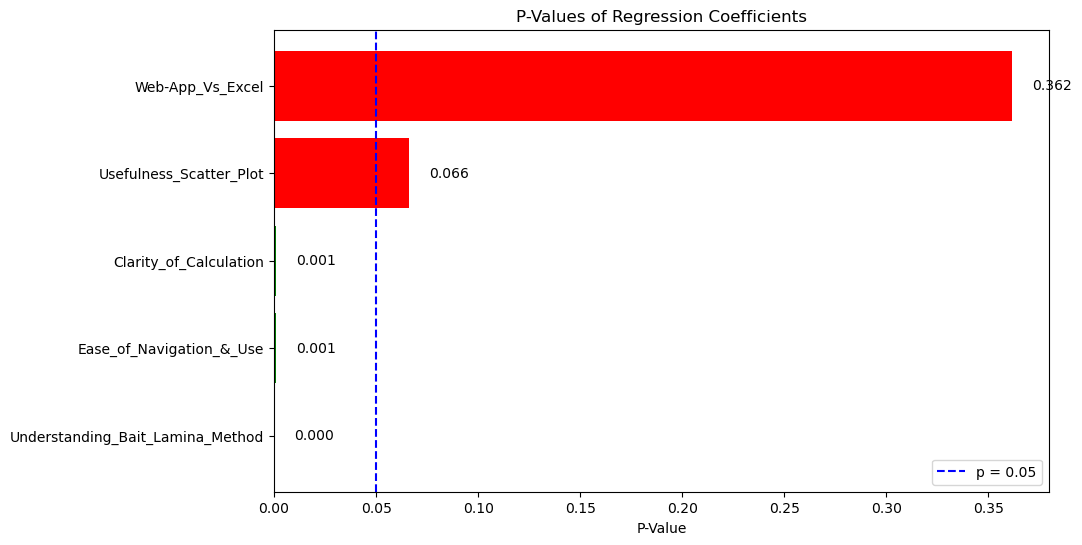

In [12]:
# Define the independent variables (X) and dependent variable (y)
X = data[['Understanding_Bait_Lamina_Method', 'Ease_of_Navigation_&_Use', 
          'Clarity_of_Calculation', 'Usefulness_Scatter_Plot', 'Web-App_Vs_Excel', 
          ]]
y = data['Overall_Satisfaction']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X, has_constant='add')

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Extract the coefficients and variable names
coefficients = pd.Series(model.params[1:], index=X.columns[1:])

# Plot the coefficients
plt.figure(figsize=(8, 6))
coefficients.plot(kind='barh')
plt.title('Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(True)
plt.show()

# Extract p-values from the model summary
p_values = model.pvalues[1:]  # Exclude the constant (intercept)

# Create a bar plot of p-values
features = X.columns[1:]  # Exclude the constant
plt.figure(figsize=(10, 6))
bars = plt.barh(features, p_values, color=np.where(p_values < 0.05, 'green', 'red'))

# Add labels and title
plt.xlabel('P-Value')
plt.title('P-Values of Regression Coefficients')
plt.axvline(x=0.05, color='blue', linestyle='--', label='p = 0.05')
plt.legend()

# Annotate the bars with p-values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', va='center')

plt.show()